<a href="https://colab.research.google.com/github/ShamilaEbenezer/covid19/blob/master/CNN_for_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [3]:
!git clone https://github.com/ShamilaEbenezer/covid19.git

Cloning into 'covid19'...
remote: Enumerating objects: 755, done.
remote: Total 755 (delta 0), reused 0 (delta 0), pack-reused 755
Receiving objects: 100% (755/755), 170.02 MiB | 36.14 MiB/s, done.


In [0]:
os.chdir('/content/covid19/Covid_ct_dataset/CT_NonCOVID')
i=1
for file in os.listdir():
      src=file
      dst="CT_NonCOVID"+str(i)+".jpg"
      os.rename(src,dst)
      i+=1
os.chdir('/content/covid19/Covid_ct_dataset/CT_COVID')
i=1
for file in os.listdir():
      src=file
      dst="CT_COVID"+str(i)+".jpg"
      os.rename(src,dst)
      i+=1

In [0]:
label_name=["CT_COVID","CT_NonCOVID"]

In [0]:

def load():
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePaths):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
	 		
			label = imagePath.split("/")[-2]
			print(label)
			print(imagePath)
			#label = imagePath.split(os.path.sep)[-2]
			image = cv2.resize(image, (64, 64),interpolation=cv2.INTER_AREA)
	    # treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			#if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				#print("[INFO] processed {}/{}".format(i + 1,
					#len(imagePaths)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))

In [7]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/covid19/Covid_ct_dataset"))
#print(imagePaths)

# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
#sp = SimplePreprocessor(32, 32)
#sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = load()
#data = data.reshape((data.shape[0], 3072))


# encode the labels as integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels,
	test_size=0.1, random_state=42)



[INFO] loading images...
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID6.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID326.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID308.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID385.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID73.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID232.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID37.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID336.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID133.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID186.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID42.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVID/CT_NonCOVID328.jpg
CT_NonCOVID
/content/covid19/Covid_ct_dataset/CT_NonCOVI

In [8]:
print(x_train.shape)

(671, 64, 64, 3)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)
y_train[100],Y_train[100]
#Y_train[10]

Using TensorFlow backend.


(1, array([0., 1.], dtype=float32))

In [11]:
print(x_test.shape)
print(x_train.shape)

(75, 64, 64, 3)
(671, 64, 64, 3)


In [12]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
#model.add()
#ip = Input(shape=(32, 32, 3))
model.add(Conv2D(16, (3, 3), input_shape=(64,64,3),padding='same', activation="relu"))
model.add(Conv2D(16, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())
#model.add(Dropout(0.3)) 
model.add(Dense(512, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [13]:
model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
epochs=15
total_test=746
batch_size=128
history=model.fit(x_train,Y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(x_test, Y_test))
score = model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



Train on 671 samples, validate on 75 samples
Epoch 1/15
671/671 [==============================] - 8s 12ms/step - loss: 0.6948 - accuracy: 0.5119 - val_loss: 0.6879 - val_accuracy: 0.6133
Epoch 2/15
671/671 [==============================] - 0s 191us/step - loss: 0.6881 - accuracy: 0.5432 - val_loss: 0.6764 - val_accuracy: 0.5867
Epoch 3/15
671/671 [==============================] - 0s 191us/step - loss: 0.6885 - accuracy: 0.5343 - val_loss: 0.6735 - val_accuracy: 0.6600
Epoch 4/15
671/671 [==============================] - 0s 201us/step - loss: 0.6539 - accuracy: 0.6259 - val_loss: 0.6374 - val_accuracy: 0.5467
Epoch 5/15
671/671 [==============================] - 0s 186us/step - loss: 0.6084 - accuracy: 0.6371 - val_loss: 0.5867 - val_accuracy: 0.6800
Epoch 6/15
671/671 [==============================] - 0s 184us/step - loss: 0.5862 - accuracy: 0.6878 - val_loss: 0.5262 - val_accuracy: 0.7000
Epoch 7/15
671/671 [==============================] - 0s 185us/step - loss: 0.5901 - accura

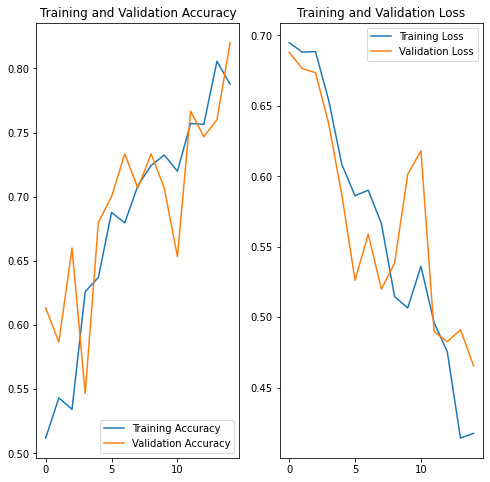

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [0]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

In [0]:
# reduce to 1d array
#yhat_probs  = yhat_probs[:,0]
#yhat_classes  = yhat_classes[:,0]

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [22]:
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)


Accuracy: 0.800000
Precision: 0.871795
Recall: 0.772727
F1 score: 0.819277
Cohens kappa: 0.597207
[[26  5]
 [10 34]]
